>**CARREGANDO DADOS E PACOTES**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#carrega o dataset
df_dsa = pd.read_csv(r"C:\Users\estudante\Desktop\Pedro\projetos\python_analytics\dataset_projeto2.csv")

##shape
#print(df_dsa.shape)
#
##amostra dos dados(5 primeiras linhas)
#print(df_dsa.head())
#
##amostra dos dados(5 ultimas linhas)
#print(df_dsa.tail())

#ANALISE EXPLORATORIA

##colunas do conjunto de dados
#print(df_dsa.columns)

##tipo de dados de cada coluna
#print(df_dsa.dtypes)

##resumo estatistico da coluna com o valor de venda
#print(df_dsa['Valor_Venda'].describe())

##verificando se há registros duplicados
#print(df_dsa[df_dsa.duplicated()])

##verificando se a valores ausentes
#print(df_dsa.isnull().sum())



> **ANALISE 01:QUAL CIDADE COM MAIOR VALOR DE VENDA DE PRODUTOS DA CATEGORIA 'OFFICE SUPPLIES'?**

In [29]:
import main as dados
dados = dados.df_dsa
#print(dados.head())

dados_office_supplies = dados[dados['Categoria'] == 'Office Supplies']

vendas_por_cidade = dados_office_supplies.groupby('Cidade')['Valor_Venda'].sum()

cidade_maior_venda_office = vendas_por_cidade.idxmax()
valor_maior_venda_office = vendas_por_cidade.max()
print(cidade_maior_venda_office)


New York City


>***RESPOSTA ANALISE 01: NEW YORK CITY***

**____________________________________________________________________________________**

**ANALISE 02:QUAL O TOTAL DE VENDAS POR DATA DO PEDIDO?**

***RESPOSTA ANALISE 02:***

Data_Pedido
2015-01-03      16.448
2015-01-04     288.060
2015-01-05      19.536
2015-01-06    4407.100
2015-01-07      87.158
Name: Valor_Venda, dtype: float64


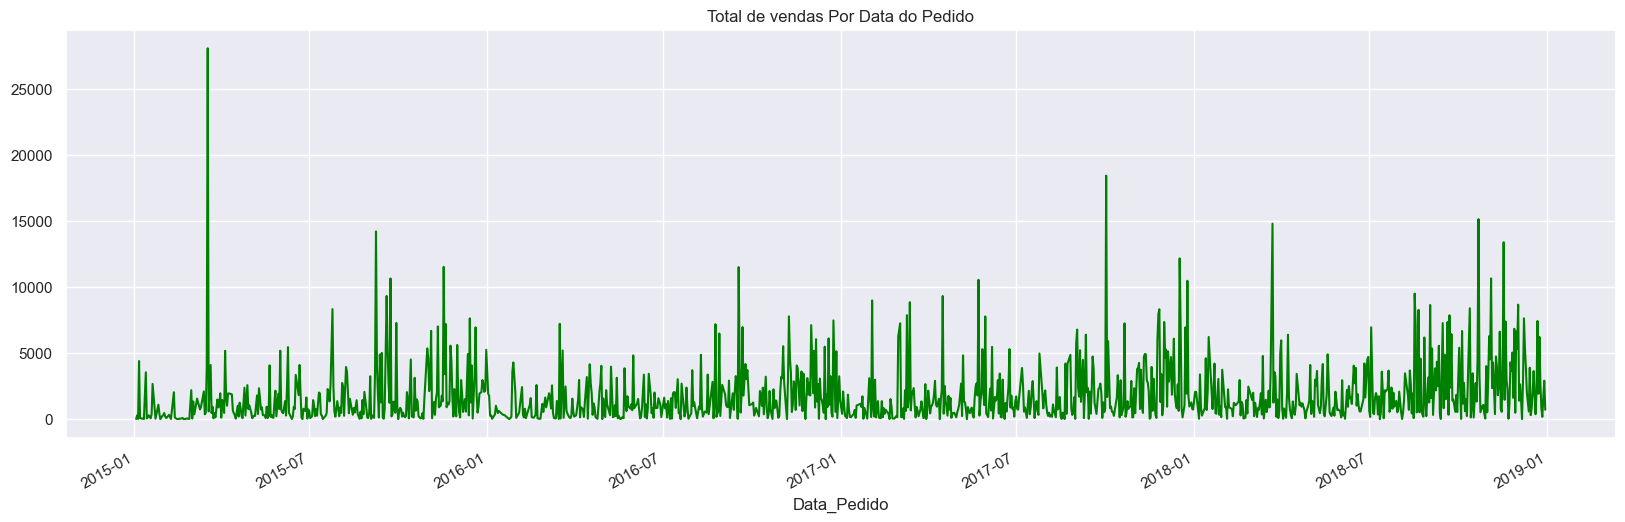

In [30]:
import main as dadoss

dados = dadoss.df_dsa
dadoss.pd.set_option('display.max_columns', None)
#print(dados.head())

vendas_por_data = dados.groupby('Data_Pedido')['Valor_Venda'].sum()

print(vendas_por_data.head())

dadoss.plt.figure(figsize= (20,6))
vendas_por_data.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
dadoss.plt.title('Total de vendas Por Data do Pedido')
dadoss.plt.show()

**____________________________________________________________________________________**

**ANALISE 03:QUAL O TOTAL DE VENDAS POR ESTADO?**

***RESPOSTA ANALISE 03:***

         Estado  Valor_Venda
0    California  442927.0975
1      New York  304536.4010
2         Texas  163549.8602
3    Washington  133826.0060
4  Pennsylvania  114411.6800


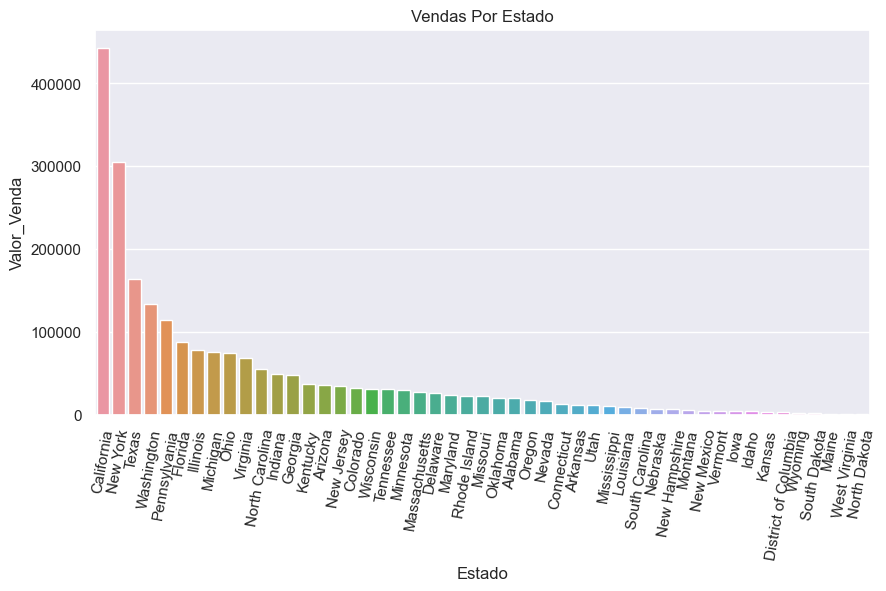

In [31]:
import main 

dados = main.df_dsa
main.pd.set_option('display.max_columns', None)

#print(dados.head())

total_vendas_estado = dados.groupby('Estado')['Valor_Venda'].sum().sort_values(ascending= False).reset_index()

print(total_vendas_estado.head())

main.plt.figure(figsize=(10,5))
main.sns.barplot(data=total_vendas_estado, y= 'Valor_Venda', x= 'Estado').set(title= 'Vendas Por Estado')
main.plt.xticks(rotation=80)
main.plt.show()

**____________________________________________________________________________________**

**ANALISE 04:QUAIS SÃO AS 10 CIDADES COM O MAIOR TOTAL DE VENDAS?**

***RESPOSTA ANALISE 04:***

            Cidade  Valor_Venda
327  New York City  251749.2190
265    Los Angeles  171654.6330
450        Seattle  114725.4780
436  San Francisco  107489.9520
372   Philadelphia  107197.8030
207        Houston   61590.1868
435      San Diego   47458.3790
80         Chicago   46974.3430
216   Jacksonville   44713.1830
123        Detroit   42446.9440


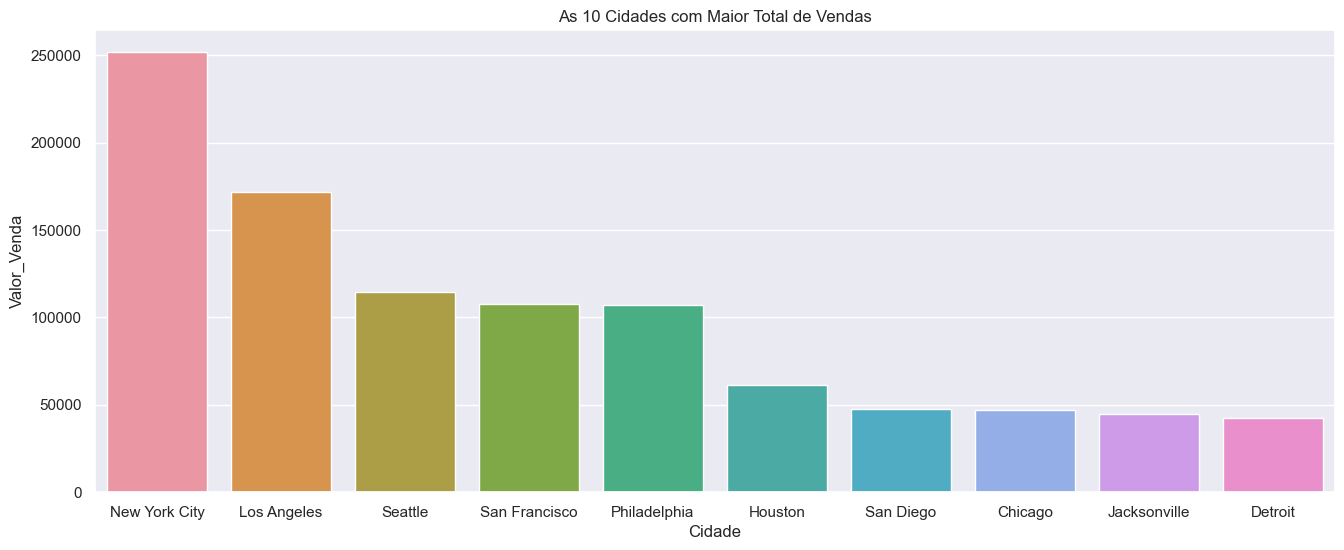

In [32]:
import main 

dados = main.df_dsa
main.pd.set_option('display.max_columns', None)

top10_cidades_vendas = dados.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by= 'Valor_Venda', ascending= False)
print(top10_cidades_vendas.head(10))

main.plt.figure(figsize=(16,6))
main.sns.set_palette('coolwarm')
main.sns.barplot(data= top10_cidades_vendas.head(10),y='Valor_Venda', x='Cidade').set(title= 'As 10 Cidades com Maior Total de Vendas')
main.plt.show()

**____________________________________________________________________________________**

**ANALISE 05:QUAL O SEGMENTO TEVE O MAIOR TOTAL DE VENDAS?**

***RESPOSTA ANALISE 05:***

      Segmento   Valor_Venda
0     Consumer  1.133834e+06
1    Corporate  6.792322e+05
2  Home Office  4.224914e+05


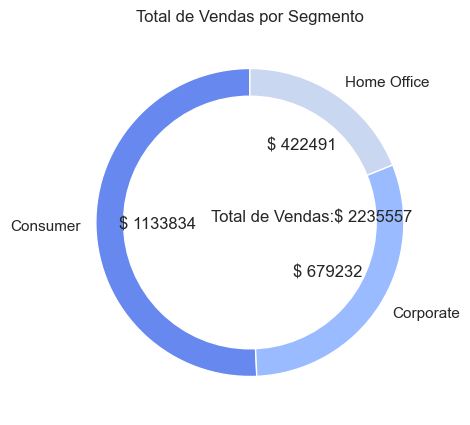

In [33]:
import main 

dados = main.df_dsa
main.pd.set_option('display.max_columns', None)

segmento_mais_venda = dados.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by= 'Valor_Venda', ascending= False)
print(segmento_mais_venda.head())

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '$ {v:d}'.format(v = val)
    return my_format

main.plt.figure(figsize=(10,5))

main.plt.pie(segmento_mais_venda['Valor_Venda'],
             labels=segmento_mais_venda['Segmento'],
             autopct=autopct_format(segmento_mais_venda['Valor_Venda']),
             startangle=90)

centre_circle = main.plt.Circle((0,0), 0.82, fc= 'white')
fig = main.plt.gcf()
fig.gca().add_artist(centre_circle)

main.plt.annotate(text='Total de Vendas:' + '$ ' + str(int(sum(segmento_mais_venda['Valor_Venda']))), xy= (-0.25, 0))
main.plt.title('Total de Vendas por Segmento')
main.plt.show()

**____________________________________________________________________________________**

**ANALISE 06:QUAL O TOTAL DE VENDAS POR SEGMENTO E POR ANO?**

***RESPOSTA ANALISE 06:***

In [34]:
import main 

dados = main.df_dsa
main.pd.set_option('display.max_columns', None)

dados['Data_Pedido'] = main.pd.to_datetime(dados['Data_Pedido'], dayfirst=True)

dados['Ano'] = dados['Data_Pedido'].dt.year

vendas_ano_seg = dados.groupby(['Ano','Segmento'])['Valor_Venda'].sum()

print(vendas_ano_seg)

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64


**____________________________________________________________________________________**

**ANALISE 07:OS GESTORES DA EMPRESA ESTÃO CONSIDERANDO CONCEDER DIFERENTES FAIXAS DE DESCONDO USANDO AS REGRAS SE
O VALOR DA VENDA FOR MAIOR QUE 1000 RECEBE 15% DE DESCONCO SE O VALOR DA VENDA FOR MENOR QUE 1000 RECEBE 10% DE DESCONCO QUANTAS VENDAS RECEBERIAM 15 % DE DESCONTO??**

In [35]:
import main 

dados = main.df_dsa
main.pd.set_option('display.max_columns', None)

dados['Desconto'] = main.np.where(dados['Valor_Venda'] > 1000, 0.15, 0.10)

ndesconto = dados['Desconto'].value_counts()

print(f'No total:{ndesconto[0.15]} receberam o desconto de 15%')

No total:457 receberam o desconto de 15%


***RESPOSTA ANALISE 07: NO TOTAL 457 RECEBERAM O DESCONTO DE 15%***

**____________________________________________________________________________________**

**ANALISE 08:CONSIDERE QUE A EMPRESA CONCEDEU O DESCONTO DE 15% QUAL SERIA A MEDIA DO VALOR DE VENDA ANTES E DEPOIS DO DESCONTO**

In [36]:
import main 

dados = main.df_dsa
main.pd.set_option('display.max_columns', None)

dados['Desconto'] = main.np.where(dados['Valor_Venda'] > 1000, 0.15, 0.10)

dados['Valor_Venda_Desconto'] = dados['Valor_Venda'] -(dados['Valor_Venda'] * dados['Desconto'])

Sem_desconto = dados.loc[dados['Desconto'] == 0.15, 'Valor_Venda']

Com_Desconto = dados.loc[dados['Desconto'] == 0.15, 'Valor_Venda_Desconto']

Media_Antes = Sem_desconto.mean()

Media_Apos = Com_Desconto.mean()

print(f' Media antes do desconto de 15% : {Media_Antes} media depois do desconto de 15% :{Media_Apos}')

 Media antes do desconto de 15% : 2116.8078153172864 media depois do desconto de 15% :1799.2866430196934


***RESPOSTA ANALISE 08: MEDIA ANTES DO DESNCONTO DE 15%: RS= 2116.80 MEDIA DEPOIS DO DESCONTO DE 15%: RS= 1799.28***

**____________________________________________________________________________________**

**ANALISE 09:QUAL A MEDIA DE VENDAS POR SEGMENTO, POR ANO E POR MÊS?**

***RESPOSTA ANALISE 09:***

<Figure size 1000x500 with 0 Axes>

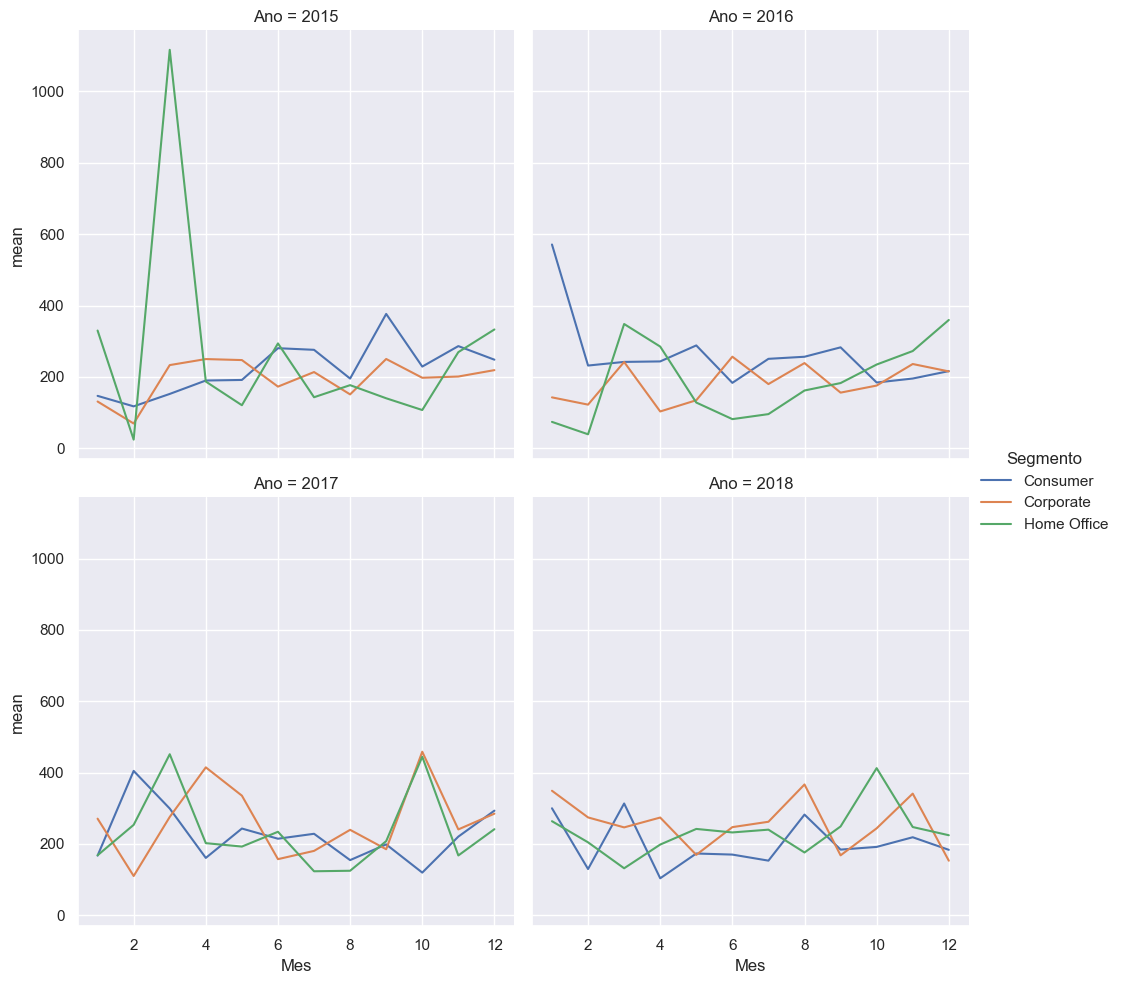

In [37]:
import main 

dados = main.df_dsa
main.pd.set_option('display.max_columns', None)

dados['Data_Pedido'] = main.pd.to_datetime(dados['Data_Pedido'], dayfirst=True)

dados['Ano'] = dados['Data_Pedido'].dt.year

dados['Mes'] = dados['Data_Pedido'].dt.month

media_seg_ano_mes = dados.groupby(['Ano','Mes','Segmento'])['Valor_Venda'].agg([main.np.sum, main.np.mean, main.np.median])

#print(media_seg_ano_mes)

anos = media_seg_ano_mes.index.get_level_values(0)
mes = media_seg_ano_mes.index.get_level_values(1)
segmento = media_seg_ano_mes.index.get_level_values(2)

main.plt.figure(figsize=(10,5))
main.sns.set()
fig1 = main.sns.relplot(kind='line',
                        data=media_seg_ano_mes,
                        y='mean',
                        x=mes,
                        hue=segmento,
                        col=anos,
                        col_wrap=2)

main.plt.show()

**____________________________________________________________________________________**

**ANALISE 10:QUAL O TOTAL DE VENDAS POR CATEGORIA E SUBCATEGORIA, CONSIDERANDO APENAS AS TOP 12 SUBCATEGORIAS ?**

***RESPOSTA ANALISE 10:***

         Categoria  Valor_Venda       Ano  Desconto  Valor_Venda_Desconto  \
0        Furniture  716910.8017   4144358    213.70          631485.62420   
1  Office Supplies  695097.7720  11799862    590.95          613400.48725   
2       Technology  823549.3810   3618020    188.20          718746.98920   

     Mes  
0  16307  
1  45575  
2  14044  


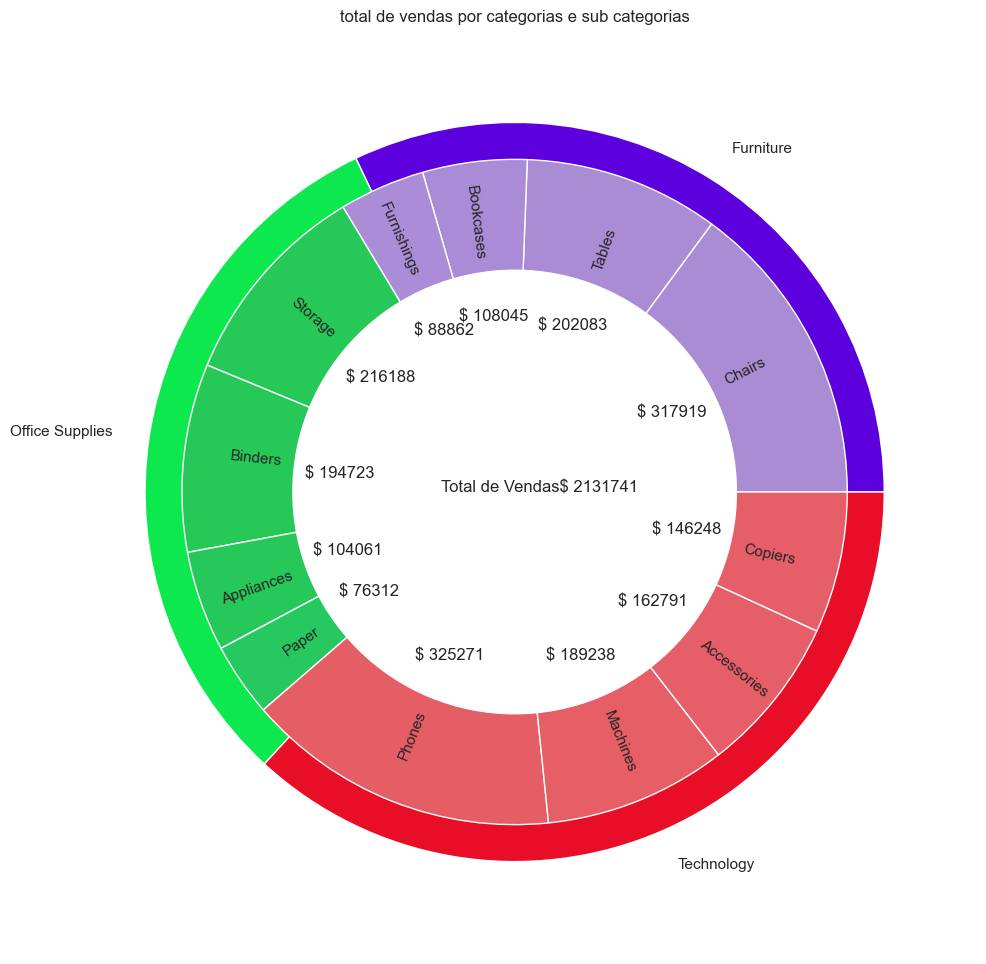

In [38]:
import main 

dados = main.df_dsa
main.pd.set_option('display.max_columns', None)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '$ {v:d}'.format(v = val)
    return my_format



vendas_sub_cat = dados.groupby(['Categoria', 'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda', ascending= False).head(12)

vendas_sub_cat = vendas_sub_cat[['Valor_Venda']].astype(int).sort_values(by='Categoria').reset_index()

agrup_categoria = dados.groupby('Categoria').sum(numeric_only = True).reset_index()

print(agrup_categoria)

cores_cat = ['#5d00de', '#0ee84f', '#e80e27']

cores_sub = ['#aa8cd4','#aa8cd5','#aa8cd6','#aa8cd7',
             '#26c957','#26c958','#26c959','#26c960',
             '#e65e65','#e65e66','#e65e67','#e65e68']

fig, ax = main.plt.subplots(figsize= (18,12) )

p1 = ax.pie(agrup_categoria['Valor_Venda'],
            radius= 1,
            labels= agrup_categoria['Categoria'],
            wedgeprops= dict(edgecolor= 'white'),
            colors= cores_cat)

p2 = ax.pie(vendas_sub_cat['Valor_Venda'],
            radius= 0.9,
            labels= vendas_sub_cat['SubCategoria'],
            autopct= autopct_format(vendas_sub_cat['Valor_Venda']),
            colors= cores_sub,
            labeldistance=0.7,
            wedgeprops=dict(edgecolor= 'white'),
            pctdistance=0.53,
            rotatelabels=True)

centre_circle = main.plt.Circle((0,0), 0.6, fc= 'white')

fig = main.plt.gcf()
fig.gca().add_artist(centre_circle)
main.plt.annotate(text='Total de Vendas' + '$ ' + str(int(sum(vendas_sub_cat['Valor_Venda']))), xy=(-0.2, 0))
main.plt.title('total de vendas por categorias e sub categorias')
main.plt.show()